In [7]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [8]:
MODELS_HOME = '../models'
DATA_HOME = '../data'

## Download and extract the datasets

* The datasets are located on Kaggle @ [www.kaggle.com/c/dogs-vs-cats/data](https://www.kaggle.com/c/dogs-vs-cats/data).
* Download and extract the dataset to `DATA_HOME` folder.

In [9]:
def create_small_dataset(target_dir):
    """Creates a smalled Cat/Dog dataset from the original Kaggle one."""
    import os, shutil
    target_dir = os.path.join(DATA_HOME, target_dir)
    original_dataset_dir = os.path.join(DATA_HOME, 'dogs-vs-cats/train')
    
    def join_and_create(base, append):
        """Joins the `base` and `append` strings to create a folder path, and creates it."""
        directory = os.path.join(base, append)
        try:
            os.mkdir(directory)
        except OSError as e:
            print("[E] Cannot create {}, skipping...".format(directory))
        return directory
    def copy_files(f_pattern, f_range, destination):
        """Copies files from the original dataset directory. f_pattern must have 1 (one) parameter for `format`"""
        # f_names = [f_pattern.format(i) for i in range(f_range[0], f_range[1])]
        for fname in (f_pattern.format(i) for i in range(f_range[0], f_range[1])):
            src = os.path.join(original_dataset_dir, fname)
            dst = os.path.join(destination, fname)
            shutil.copyfile(src, dst)
    
    base_dir = join_and_create(target_dir, '')
    
    train_dir = join_and_create(base_dir, 'train')
    validation_dir = join_and_create(base_dir, 'validation')
    test_dir = join_and_create(base_dir, 'test')
    
    train_cats_dir = join_and_create(train_dir, 'cats')
    train_dogs_dir = join_and_create(train_dir, 'dogs')
    validation_cats_dir = join_and_create(validation_dir, 'cats')
    validation_dogs_dir = join_and_create(validation_dir, 'dogs')
    test_cats_dir = join_and_create(test_dir, 'cats')
    test_dogs_dir = join_and_create(test_dir, 'dogs')
    
    copy_files('cat.{}.jpg', (0, 1000), train_cats_dir)
    copy_files('cat.{}.jpg', (1000, 1500), validation_cats_dir)
    copy_files('cat.{}.jpg', (1500, 2000), test_cats_dir)
    copy_files('dog.{}.jpg', (0, 1000), train_dogs_dir)
    copy_files('dog.{}.jpg', (1000, 1500), validation_dogs_dir)
    copy_files('dog.{}.jpg', (1500, 2000), test_dogs_dir)
    
    return base_dir, train_dir, validation_dir, test_dir
    
base_dir, train_dir, validation_dir, test_dir = create_small_dataset('dogs-vs-cats_small')

[E] Cannot create ../data/dogs-vs-cats_small/, skipping...
[E] Cannot create ../data/dogs-vs-cats_small/train, skipping...
[E] Cannot create ../data/dogs-vs-cats_small/validation, skipping...
[E] Cannot create ../data/dogs-vs-cats_small/test, skipping...
[E] Cannot create ../data/dogs-vs-cats_small/train/cats, skipping...
[E] Cannot create ../data/dogs-vs-cats_small/train/dogs, skipping...
[E] Cannot create ../data/dogs-vs-cats_small/validation/cats, skipping...
[E] Cannot create ../data/dogs-vs-cats_small/validation/dogs, skipping...
[E] Cannot create ../data/dogs-vs-cats_small/test/cats, skipping...
[E] Cannot create ../data/dogs-vs-cats_small/test/dogs, skipping...


## Create a model

- Create a model
- Train the model to have a baseline for the performance
- Visualize the accuracy and loss

In [10]:
def make_model():
    from keras import layers
    from keras import models
    from keras import optimizers
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
    return model

model = make_model()

Using TensorFlow backend.


In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50
)
model.save(os.path.jon(MODELS_HOME, 'cats_and_dogs_small_1.h5'))

Epoch 1/30
100/100 [==============================] - 6s 64ms/step - loss: 0.6923 - acc: 0.5310 - val_loss: 0.6833 - val_acc: 0.5350
Epoch 2/30
100/100 [==============================] - 5s 51ms/step - loss: 0.6597 - acc: 0.5955 - val_loss: 0.6421 - val_acc: 0.6390
Epoch 3/30
100/100 [==============================] - 5s 50ms/step - loss: 0.6233 - acc: 0.6580 - val_loss: 0.6212 - val_acc: 0.6550
Epoch 4/30
100/100 [==============================] - 5s 50ms/step - loss: 0.5735 - acc: 0.6995 - val_loss: 0.6442 - val_acc: 0.6160
Epoch 5/30
100/100 [==============================] - 5s 50ms/step - loss: 0.5406 - acc: 0.7290 - val_loss: 0.6004 - val_acc: 0.6750
Epoch 6/30
100/100 [==============================] - 5s 50ms/step - loss: 0.5107 - acc: 0.7480 - val_loss: 0.6420 - val_acc: 0.6570
Epoch 7/30
100/100 [==============================] - 5s 50ms/step - loss: 0.4857 - acc: 0.7665 - val_loss: 0.5741 - val_acc: 0.6920
Epoch 8/30
100/100 [==============================] - 5s 51ms/step - 

In [6]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

<IPython.core.display.Javascript object>


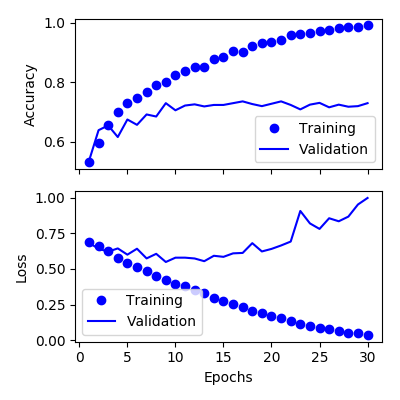

In [7]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize=(4, 4))

ax[0].plot(epochs, acc, 'bo', label='Training')
ax[0].plot(epochs, val_acc, 'b', label='Validation')
ax[0].legend()
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, loss, 'bo', label='Training')
ax[1].plot(epochs, val_loss, 'b', label='Validation')
# ax[1].yaxis.tick_right()
ax[1].legend()
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')
plt.tight_layout()

## Data augmentation

- Augment the data
- Visualize the augmented data

In [28]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

<IPython.core.display.Javascript object>


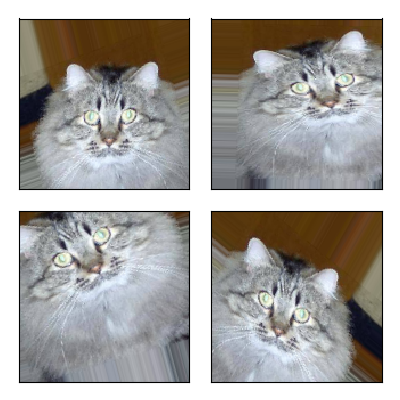

In [31]:
from keras.preprocessing import image
import os

fnames = [os.path.join(train_dir, 'cats', fname) for fname in os.listdir(os.path.join(train_dir, 'cats'))]
img_path = fnames[3]

img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

fig, ax = plt.subplots(2, 2, sharex = True, sharey = True, figsize=(4, 4))
for idx, batch in enumerate(datagen.flow(x, batch_size=1)):
    ax[idx // 2][idx % 2].imshow(image.array_to_img(batch[0]))
    ax[idx // 2][idx % 2].set_xticks([])
    ax[idx // 2][idx % 2].set_yticks([])
    if (idx + 1) % 4 == 0:
        break
plt.tight_layout()

## Retrain the model using data augmentation

In [10]:
def make_model_do():
    from keras import layers
    from keras import models
    from keras import optimizers
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  metrics=['acc'])
    return model

model = make_model_do()

In [11]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    # fill_mode = 'nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50
)
model.save(os.path.join(MODELS_HOME, 'cats_and_dogs_small_2.h5'))

Epoch 1/100
100/100 [==============================] - 19s 188ms/step - loss: 0.6891 - acc: 0.5262 - val_loss: 0.6800 - val_acc: 0.5349
Epoch 2/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6752 - acc: 0.5700 - val_loss: 0.6566 - val_acc: 0.5964
Epoch 3/100
100/100 [==============================] - 16s 165ms/step - loss: 0.6527 - acc: 0.6097 - val_loss: 0.6638 - val_acc: 0.5850
Epoch 4/100
100/100 [==============================] - 16s 164ms/step - loss: 0.6358 - acc: 0.6316 - val_loss: 0.6210 - val_acc: 0.6390
Epoch 5/100
100/100 [==============================] - 17s 167ms/step - loss: 0.6115 - acc: 0.6653 - val_loss: 0.5823 - val_acc: 0.6929
Epoch 6/100
100/100 [==============================] - 18s 177ms/step - loss: 0.6022 - acc: 0.6716 - val_loss: 0.6012 - val_acc: 0.6586
Epoch 7/100
100/100 [==============================] - 16s 164ms/step - loss: 0.5904 - acc: 0.6909 - val_loss: 0.6261 - val_acc: 0.6383
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 17s 173ms/step - loss: 0.4012 - acc: 0.8175 - val_loss: 0.4446 - val_acc: 0.8027
Epoch 62/100
100/100 [==============================] - 17s 170ms/step - loss: 0.3901 - acc: 0.8266 - val_loss: 0.4565 - val_acc: 0.8065
Epoch 63/100
100/100 [==============================] - 17s 166ms/step - loss: 0.3929 - acc: 0.8200 - val_loss: 0.4289 - val_acc: 0.8147
Epoch 64/100
100/100 [==============================] - 17s 167ms/step - loss: 0.4040 - acc: 0.8203 - val_loss: 0.4189 - val_acc: 0.8014
Epoch 65/100
100/100 [==============================] - 17s 173ms/step - loss: 0.3891 - acc: 0.8194 - val_loss: 0.4760 - val_acc: 0.7944
Epoch 66/100
100/100 [==============================] - 17s 167ms/step - loss: 0.3869 - acc: 0.8197 - val_loss: 0.4548 - val_acc: 0.7944
Epoch 67/100
100/100 [==============================] - 17s 167ms/step - loss: 0.3866 - acc: 0.8144 - val_loss: 0.4557 - val_acc: 0.8052
Epoch 68/100
100/100 [===================

In [13]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

<IPython.core.display.Javascript object>


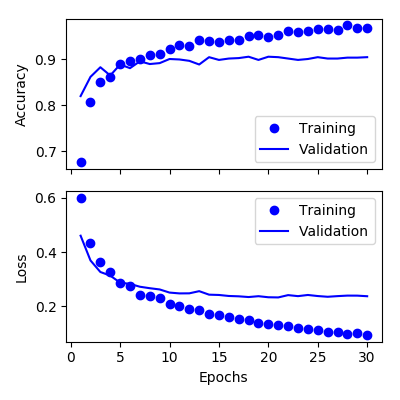

In [22]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize=(4, 4))

ax[0].plot(epochs, acc, 'bo', label='Training')
ax[0].plot(epochs, val_acc, 'b', label='Validation')
ax[0].legend()
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, loss, 'bo', label='Training')
ax[1].plot(epochs, val_loss, 'b', label='Validation')
# ax[1].yaxis.tick_right()
ax[1].legend()
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')

plt.tight_layout()

## Use pretrained model

In [15]:
from keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150, 150, 3))
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

### Fast features using the pretrained conv base

In [16]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size = (150, 150),
        batch_size = batch_size,
        class_mode = 'binary'
    )
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
def model_head():
    from keras import models
    from keras import layers
    from keras import optimizers
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', input_dim = 4*4*512))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer = optimizers.RMSprop(lr=2e-5),
                  loss = 'binary_crossentropy',
                  metrics = ['acc'])
    return model

model = model_head()
history = model.fit(train_features, train_labels,
                    epochs = 30,
                    batch_size = 20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 267us/step - loss: 0.5995 - acc: 0.6755 - val_loss: 0.4602 - val_acc: 0.8200
Epoch 2/30
2000/2000 [==============================] - 0s 216us/step - loss: 0.4350 - acc: 0.8065 - val_loss: 0.3689 - val_acc: 0.8620
Epoch 3/30
2000/2000 [==============================] - 0s 214us/step - loss: 0.3630 - acc: 0.8515 - val_loss: 0.3264 - val_acc: 0.8830
Epoch 4/30
2000/2000 [==============================] - 0s 214us/step - loss: 0.3277 - acc: 0.8615 - val_loss: 0.3130 - val_acc: 0.8650
Epoch 5/30
2000/2000 [==============================] - 0s 211us/step - loss: 0.2868 - acc: 0.8890 - val_loss: 0.2871 - val_acc: 0.8890
Epoch 6/30
2000/2000 [==============================] - 0s 209us/step - loss: 0.2739 - acc: 0.8975 - val_loss: 0.2825 - val_acc: 0.8810
Epoch 7/30
2000/2000 [==============================] - 0s 210us/step - loss: 0.2430 - acc: 0.9020 - val_loss: 0.2720 - val_acc: 0.8960


In [18]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

<IPython.core.display.Javascript object>


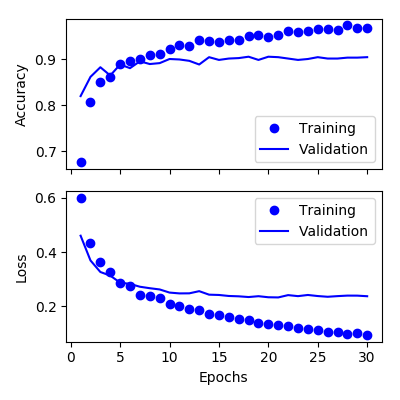

In [19]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize=(4, 4))

ax[0].plot(epochs, acc, 'bo', label='Training')
ax[0].plot(epochs, val_acc, 'b', label='Validation')
ax[0].legend()
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, loss, 'bo', label='Training')
ax[1].plot(epochs, val_loss, 'b', label='Validation')
# ax[1].yaxis.tick_right()
ax[1].legend()
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')

plt.tight_layout()

## Feature extraction with data augmentation

- We can freeze some of the layers

In [52]:
def model_freeze():
    from keras import models
    from keras import layers
    from keras import optimizers
    
    conv_base.trainable = False
    
    model = models.Sequential()
    model.add(conv_base)
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=2e-5),
                  metrics=['acc'])
    return model
model = model_freeze()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_8 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 8192)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
________________________________________________________

In [53]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [54]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 50
)

Epoch 1/30
100/100 [==============================] - 14s 142ms/step - loss: 0.8341 - acc: 0.5455 - val_loss: 0.5821 - val_acc: 0.6550
Epoch 2/30
100/100 [==============================] - 13s 134ms/step - loss: 0.7443 - acc: 0.5885 - val_loss: 0.4892 - val_acc: 0.8030
Epoch 3/30
100/100 [==============================] - 14s 138ms/step - loss: 0.6685 - acc: 0.6320 - val_loss: 0.4513 - val_acc: 0.8310
Epoch 4/30
100/100 [==============================] - 13s 135ms/step - loss: 0.6405 - acc: 0.6615 - val_loss: 0.4224 - val_acc: 0.8430
Epoch 5/30
100/100 [==============================] - 13s 135ms/step - loss: 0.5734 - acc: 0.6935 - val_loss: 0.3982 - val_acc: 0.8520
Epoch 6/30
100/100 [==============================] - 14s 135ms/step - loss: 0.5683 - acc: 0.7005 - val_loss: 0.3819 - val_acc: 0.8580
Epoch 7/30
100/100 [==============================] - 13s 135ms/step - loss: 0.5547 - acc: 0.7165 - val_loss: 0.3683 - val_acc: 0.8560
Epoch 8/30
100/100 [==============================] - 1

In [55]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

<IPython.core.display.Javascript object>


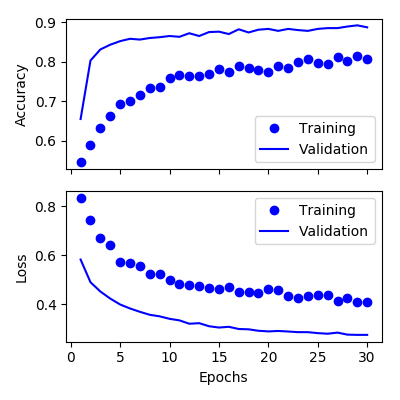

In [56]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize=(4, 4))

ax[0].plot(epochs, acc, 'bo', label='Training')
ax[0].plot(epochs, val_acc, 'b', label='Validation')
ax[0].legend()
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, loss, 'bo', label='Training')
ax[1].plot(epochs, val_loss, 'b', label='Validation')
# ax[1].yaxis.tick_right()
ax[1].legend()
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')

plt.tight_layout()

## Fine tuning the network

- Train the whole network (with head)
- Unfreeze some parts of previously trained, and retrained

In [58]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [62]:
conv_base.trainable = True
for layer in conv_base.layers:
    if 'block5' in layer.name:
        layer.trainable = True
    else:
        layer.trainable = False

In [65]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 50
)

Epoch 1/100
100/100 [==============================] - 16s 161ms/step - loss: 0.4249 - acc: 0.8035 - val_loss: 0.2351 - val_acc: 0.9000
Epoch 2/100
100/100 [==============================] - 16s 158ms/step - loss: 0.3577 - acc: 0.8430 - val_loss: 0.2151 - val_acc: 0.9100
Epoch 3/100
100/100 [==============================] - 16s 158ms/step - loss: 0.3192 - acc: 0.8575 - val_loss: 0.2015 - val_acc: 0.9090
Epoch 4/100
100/100 [==============================] - 16s 159ms/step - loss: 0.3001 - acc: 0.8680 - val_loss: 0.1895 - val_acc: 0.9180
Epoch 5/100
100/100 [==============================] - 16s 157ms/step - loss: 0.2848 - acc: 0.8695 - val_loss: 0.1864 - val_acc: 0.9230
Epoch 6/100
100/100 [==============================] - 16s 158ms/step - loss: 0.2624 - acc: 0.8845 - val_loss: 0.1861 - val_acc: 0.9240
Epoch 7/100
100/100 [==============================] - 16s 158ms/step - loss: 0.2771 - acc: 0.8845 - val_loss: 0.1808 - val_acc: 0.9240
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 15s 153ms/step - loss: 0.0662 - acc: 0.9805 - val_loss: 0.2494 - val_acc: 0.9410
Epoch 62/100
100/100 [==============================] - 15s 153ms/step - loss: 0.0537 - acc: 0.9795 - val_loss: 0.2918 - val_acc: 0.9390
Epoch 63/100
100/100 [==============================] - 15s 153ms/step - loss: 0.0541 - acc: 0.9790 - val_loss: 0.2435 - val_acc: 0.9380
Epoch 64/100
100/100 [==============================] - 16s 157ms/step - loss: 0.0484 - acc: 0.9820 - val_loss: 0.2749 - val_acc: 0.9380
Epoch 65/100
100/100 [==============================] - 16s 159ms/step - loss: 0.0535 - acc: 0.9825 - val_loss: 0.2808 - val_acc: 0.9380
Epoch 66/100
100/100 [==============================] - 16s 159ms/step - loss: 0.0442 - acc: 0.9840 - val_loss: 0.2481 - val_acc: 0.9390
Epoch 67/100
100/100 [==============================] - 16s 159ms/step - loss: 0.0518 - acc: 0.9835 - val_loss: 0.2978 - val_acc: 0.9420
Epoch 68/100
100/100 [===================

In [66]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

<IPython.core.display.Javascript object>


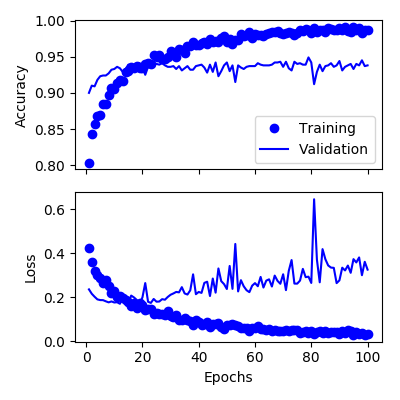

In [68]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize=(4, 4))

ax[0].plot(epochs, acc, 'bo', label='Training')
ax[0].plot(epochs, val_acc, 'b', label='Validation')
ax[0].legend()
ax[0].set_ylabel('Accuracy')

ax[1].plot(epochs, loss, 'bo', label='Training')
ax[1].plot(epochs, val_loss, 'b', label='Validation')
# ax[1].yaxis.tick_right()
# ax[1].legend()
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epochs')

plt.tight_layout()

In [69]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print(test_loss, test_acc)

Found 1000 images belonging to 2 classes.
(0.3933740245147446, 0.9379999947547912)


In [70]:
model.save(os.path.join(MODELS_HOME, 'cats_and_dogs_small_3.h5'))